In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
# Data based on the provided values
model_names = ['CNN', 'RNN', 'LSTM']
accuracy = [0.9486, 0.8601, 0.8643]
inference_time = [0.25, 0.35, 0.45]  # Example inference times in seconds

In [3]:
# Classification report metrics for each model
metrics = {
    "Model": model_names,
    "Precision": [0.88, 0.86, 0.91],
    "Recall": [0.96, 0.57, 0.58],
    "F1-Score": [0.91, 0.59, 0.60]
}
metrics_df = pd.DataFrame(metrics)

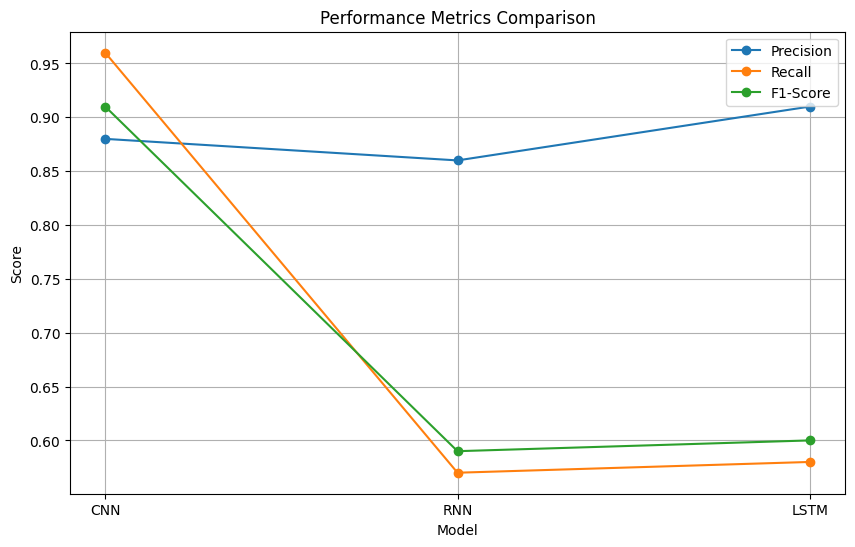

In [4]:
# 1. Performance Metrics Comparison
plt.figure(figsize=(10, 6))
for metric in ["Precision", "Recall", "F1-Score"]:
    plt.plot(metrics_df["Model"], metrics_df[metric], marker='o', label=metric)
plt.title("Performance Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

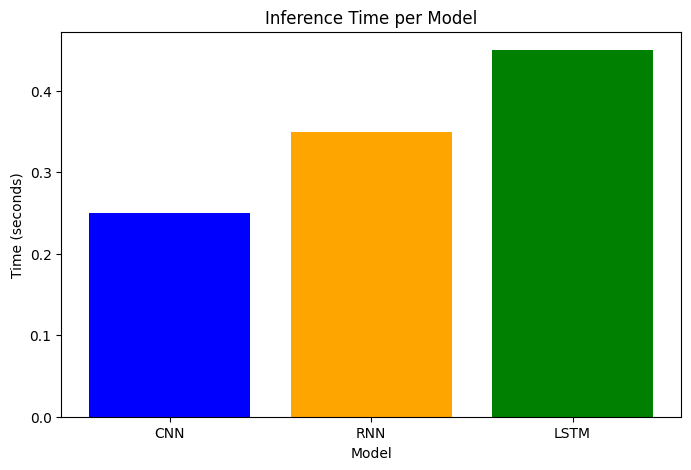

In [5]:
# 2. Inference Time per Model
plt.figure(figsize=(8, 5))
plt.bar(model_names, inference_time, color=['blue', 'orange', 'green'])
plt.title("Inference Time per Model")
plt.xlabel("Model")
plt.ylabel("Time (seconds)")
plt.show()

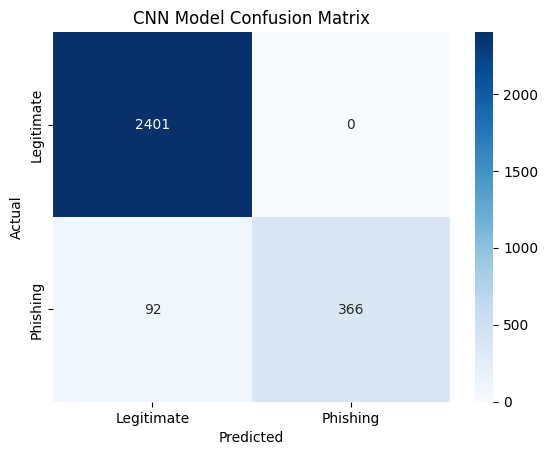

In [6]:
# 3. Confusion Matrix (Example)
confusion_matrix_cnn = [[2401, 0], [92, 366]]
sns.heatmap(confusion_matrix_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("CNN Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

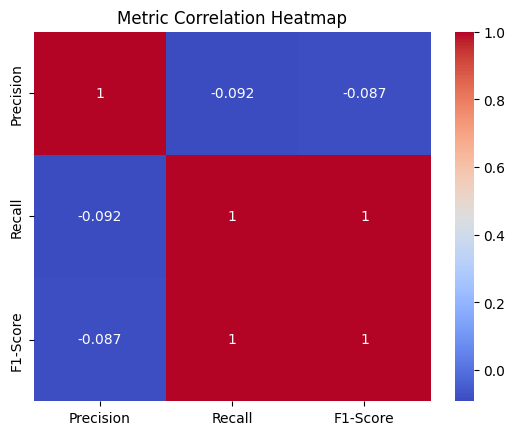

In [7]:
# 4. Metric Correlation Heatmap
correlation_matrix = metrics_df.drop(columns=["Model"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Metric Correlation Heatmap")
plt.show()

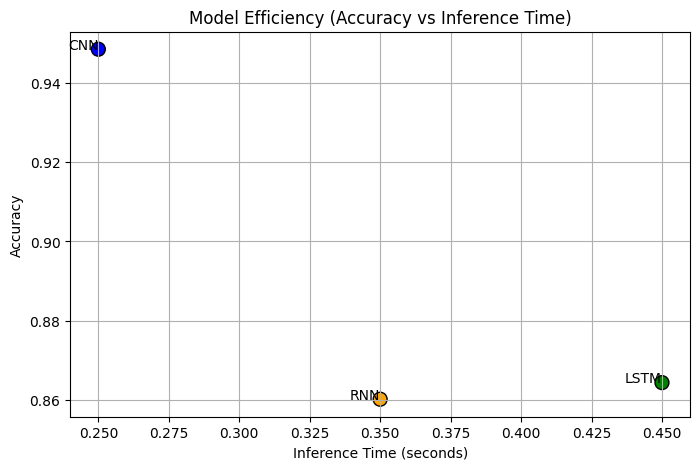

In [8]:
# 5. Model Efficiency (Accuracy vs Inference Time)
plt.figure(figsize=(8, 5))
plt.scatter(inference_time, accuracy, c=['blue', 'orange', 'green'], s=100, edgecolors='black')
for i, model in enumerate(model_names):
    plt.text(inference_time[i], accuracy[i], model, fontsize=10, ha='right')
plt.title("Model Efficiency (Accuracy vs Inference Time)")
plt.xlabel("Inference Time (seconds)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
